In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C://Users//Nehal//Downloads//Real fake news//Real_fake_news.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [4]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0
4869,2435,2435,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,False,FAKE,0


In [5]:
df.shape

(4870, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,BinaryNumTarget
count,4870.000000,4870.000000,4870.000000
mean,1217.500000,1217.500000,0.500000
std,702.996251,702.996251,0.500051
min,0.000000,0.000000,0.000000
25%,609.000000,609.000000,0.000000
50%,1217.500000,1217.500000,0.500000
75%,1826.000000,1826.000000,1.000000
max,2435.000000,2435.000000,1.000000


In [8]:
# Dropping the unnecessary columns
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [9]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [10]:
# Dropping the rows with null values
df.dropna()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...
4865,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [11]:
df.shape

(4870, 6)

In [12]:
#FInding rows that have duplicate values
df[df.duplicated(keep = 'last')] 

,author,statement,source,target,BinaryTarget,BinaryNumTarget
1406,Sue Owen,Says Milken Institute rated San Antonio as nat...,Julián Castro,True,REAL,1
4249,Daniel Funke,Says a series of photos show Iranian rockets b...,Facebook posts,False,FAKE,0


In [13]:
#Removing the duplicates
df = df.drop_duplicates(subset = None, keep ='first')

In [14]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [15]:
df.BinaryNumTarget.value_counts()

0    2434
1    2434
Name: BinaryNumTarget, dtype: int64

In [16]:
# Defining numerical and categorical variables
num_atr=[]

cat_atr=['author' , 'statement' , 'source']

In [17]:
# Correlation Matrix
df.corr()

,target,BinaryNumTarget
target,1.0,1.0
BinaryNumTarget,1.0,1.0


In [18]:
df.dtypes

author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

In [19]:
df.columns

Index(['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
      dtype='object')

In [20]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [21]:
# Decision Tree Classification Algorithm

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
y.shape

(4868,)

In [27]:
X.shape

(4868, 3)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
X_train[cat_atr].head()

,author,statement,source
2175,20,627,561
4735,171,637,617
1151,110,611,294
3873,54,2788,1123
1529,119,957,766


In [31]:
Xtr = X_train[cat_atr]
Xtr.shape 

(3407, 3)

In [32]:
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

Xtr1 = X_test[cat_atr] 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(1461, 3)

In [33]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [34]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dt.predict(Xtr1)

In [36]:
np.sum((y_test == y_pred))/y_test.size
# Accuracy is 46.40%

0.486652977412731

In [37]:
df.columns

Index(['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
      dtype='object')

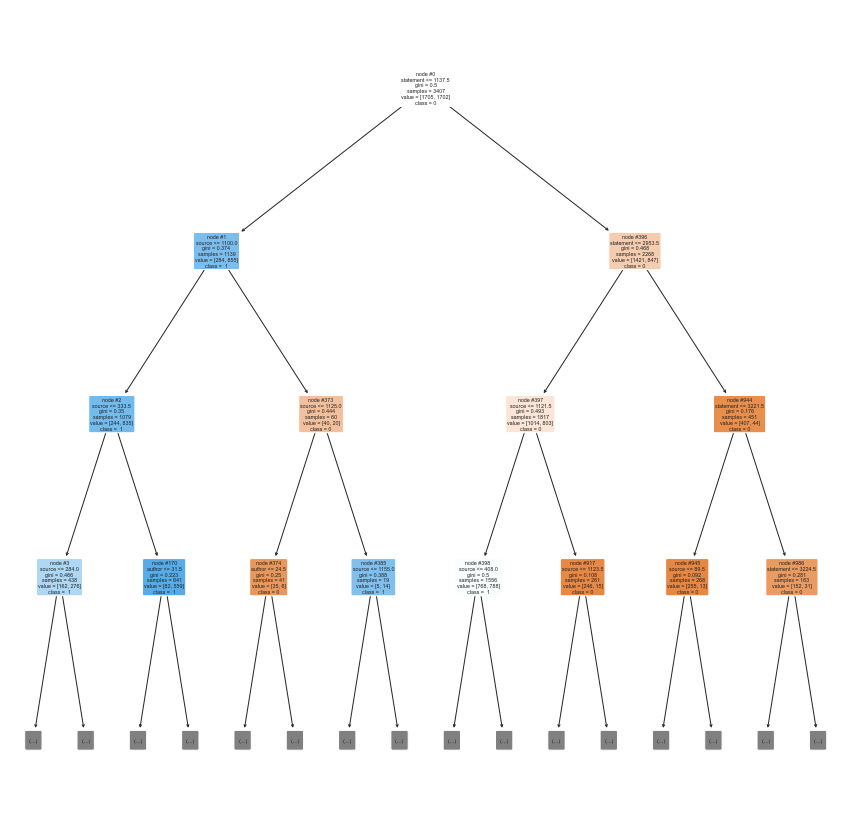

In [38]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
            class_names = ['0',' 1']
            )

_=plt.show()